In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from random import randint, uniform,random

def graficas():
    edad.view()
    manejo.view()
    riesgo.view()

riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')
manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'manejo')
edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
edad['joven'] = fuzz.trimf(edad.universe, [18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trimf(edad.universe, [40, 60, 70])
       


manejo['bajo'] = fuzz.trimf(manejo.universe, [0, 10, 20])
manejo['medio'] = fuzz.trimf(manejo.universe, [10, 40, 60])
manejo['alto'] = fuzz.trimf(manejo.universe, [50, 70, 100])
    

riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 10, 20])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [10, 30, 45])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [40, 55, 100])
    
regla1 = ctrl.Rule(manejo['bajo'] and edad['joven'], riesgo['medio'])
regla2 = ctrl.Rule(manejo['medio'] and edad['joven'], riesgo['alto'])
regla3 = ctrl.Rule(manejo['alto'] and edad['joven'], riesgo['alto'])

regla4 = ctrl.Rule(manejo['bajo'] and edad['adulto'], riesgo['bajo'])
regla5 = ctrl.Rule(manejo['medio'] and edad['adulto'], riesgo['medio'])
regla6 = ctrl.Rule(manejo['alto'] and edad['adulto'], riesgo['alto'])

regla7 = ctrl.Rule(manejo['bajo'] and edad['mayor'], riesgo['medio'])
regla8 = ctrl.Rule(manejo['medio'] and edad['mayor'], riesgo['alto'])
regla9 = ctrl.Rule(manejo['alto'] and edad['mayor'], riesgo['alto'])

regla10 = ctrl.Rule(edad['joven'] and manejo['bajo'], riesgo['medio'])
regla11 = ctrl.Rule(edad['joven'] and manejo['medio'], riesgo['alto'])
regla12 = ctrl.Rule(edad['joven'] and manejo['alto'], riesgo['alto'])

regla13 = ctrl.Rule(edad['adulto'] and manejo['bajo'], riesgo['bajo'])
regla14 = ctrl.Rule(edad['adulto'] and manejo['medio'], riesgo['medio'])
regla15 = ctrl.Rule(edad['adulto'] and manejo['alto'], riesgo['alto'])

regla16 = ctrl.Rule(edad['mayor'] and manejo['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(edad['mayor'] and manejo['medio'], riesgo['alto'])
regla18 = ctrl.Rule(edad['mayor'] and manejo['alto'], riesgo['alto'])

riesgo_ctrl = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9
                                 ,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18])
    
riesgos = ctrl.ControlSystemSimulation(riesgo_ctrl)
    


23 0.035


/home/RobertoPacho/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


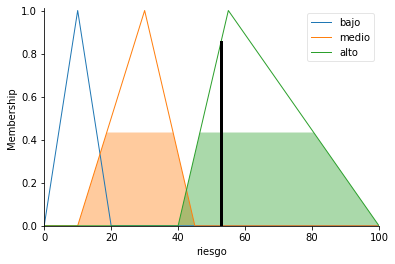

In [2]:
from tkinter import *
import tkinter.font as tkFont
from tkinter import ttk
import gym
from neo4j import GraphDatabase
import random


fila=0
columna=0
cuenta=0
nlista=0
porcen=0
edadn=0

def randon():
    porcen=(random.randrange(10, 100))/100
    edadn=random.randrange(10, 80)

ancho=1000-20
alto=900-80
my_list1=[]

root1 = Tk()
root1.title("Examen SE")
root1.geometry('1500x900')
root1.configure(bg='black')
fontStyle = tkFont.Font(family="Lucida Grande", size=12)
fontStyle1 = tkFont.Font(family="Lucida Grande", size=17)

tipo=Label(root1,text='Generos:', font=fontStyle,bg='white')
tipo.place(x=100,y=15)

tipo=Label(root1,text='PELICULAS RECOMENDADAS', font=fontStyle1,bg='black',fg="white")
tipo.place(x=600,y=15)


fame1= Frame(root1, width=ancho, height=alto, bg='white')
fame1.place(x=10, y=50)
fame1.grid_propagate(False)

frame2= Frame(root1, width=ancho-600, height=alto-100, bg='black')
frame2.place(x=1050, y=50)
frame2.grid_propagate(False)

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close() 
        
    def crear_usuario(self, tx, nombre1, edad1, porcentaje1):
        tx.run("CREATE (cliente:Persona {name:$nombre1, edad:$edad1 ,porcentaje:$porcen1 })", 
               nombre1=nombre1,edad1=edad1,porcen1=porcentaje1)
        
    def nombres(self,tx,pelic):
        result = tx.run("MATCH(p:Pelicula) WHERE p.genero= $peli RETURN p.name", peli=pelic)
        for line in result:
            listap()
            mensaje=str(line)
            tam=len(mensaje)-2
            mensajea = mensaje[16:tam]
            my_list1.insert(nlista, mensajea)
            
    def recomendaciones(self,tx,reco,vjuego):
        result = tx.run("MATCH    (b:Persona)-[r:RATED]->(m:Pelicula), (b)-[s:SIMILARITY]-(a:Persona {name:$recomendara})\n"
                        "WHERE    NOT((a)-[:RATED]->(m))\n"
                        "WITH     m, s.similarity AS similarity, r.rating AS rating\n"
                        "ORDER BY m.name, similarity DESC\n"
                        "WITH     m.name AS pelicula, COLLECT(rating)[0..3] AS ratings\n"
                        "WITH     pelicula, REDUCE(s = 0, i IN ratings | s + i)*1.0/20 AS reco\n"
                        "ORDER BY reco DESC\n"
                        "RETURN   pelicula AS Pelicula, reco AS Recommendation",recomendara=reco)
        etomo=Label(vjuego,text="TE RECOMENDAMOS :",fg='white', bg='black',font=fontStyle1)
        etomo.place(x=100,y=570)

        frame1 = Frame(vjuego)
        frame1.place(x=100,y=600)


        scrollbar = Scrollbar(frame1)
        scrollbar.pack( side = RIGHT, fill = Y )

        mylist = Listbox(frame1, yscrollcommand = scrollbar.set )
        for line in result:
            mensaje=str(line)
            tam=len(mensaje)-21
            mensajea = mensaje[18:tam]
            mylist.insert(END, mensajea)

        mylist.pack( side = LEFT, fill = BOTH )
        scrollbar.config( command = mylist.yview )
        
    def datosp(self,tx,frame2,person):
        global edadn
        global porcen
        result=tx.run("MATCH(p:Persona) WHERE p.name=$person RETURN p.edad AS edad1 ,p.name AS name1,p.porcentaje AS porcentaje1",person=person)
        for line in result:
            r1=(line["edad1"])
            r2=(line["name1"])
            r3=(line["porcentaje1"])
            edadn=int(r1)
            porcen=float(r3)
            
            usuario2 = Label(frame2, text=str(edadn),fg='black', bg='white', justify='center',font=fontStyle1)
            usuario2.place(x=140, y=250, width=200) 
            usuario3 = Label(frame2,text=str(porcen), fg='black', bg='white', justify='center',font=fontStyle1)
            usuario3.place(x=140, y=300, width=200) 
            
            
            
def crear():
    randon()
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'pruebadata')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.crear_usuario,usuario1.get(),edadn,porcen)
        
usuario1 = Entry(frame2, fg='black', bg='white', justify='center')
usuario1.place(x=140, y=200, width=200) 
usuario2 = Label(frame2, text=str(edadn),fg='black', bg='white', justify='center',font=fontStyle1)
usuario2.place(x=140, y=250, width=200) 
usuario3 = Label(frame2,text=str(porcen), fg='black', bg='white', justify='center',font=fontStyle1)
usuario3.place(x=140, y=300, width=200) 

def recomendar():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'pruebadata')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.recomendaciones,usuario1.get(),frame2)
        
def buscarp():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'pruebadata')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.datosp,frame2,usuario1.get())
    
    
def calcular():
    print(edadn,porcen)
    riesgos.input['manejo'] = int(edadn)
    riesgos.input['edad'] = float(porcen)
    riesgos.compute()
    calculado=riesgos.output['riesgo']
    
    txto5 = Label(frame2,text=str(calculado), fg='white', bg='black', font=fontStyle1)
    txto5.place(x=10, y=400)
    riesgo.view(sim=riesgos)

txto1 = Label(frame2,text="CLIENTE: ", fg='white', bg='black',font=fontStyle1)
txto1.place(x=1, y=140, width=115)
txto2 = Label(frame2,text="Nombre : ", fg='white', bg='black', font=fontStyle1)
txto2.place(x=10, y=200)
usuario1 = Entry(frame2, fg='black', bg='white', justify='center',font=fontStyle1)
usuario1.place(x=140, y=200, width=200) 
btn8 = Button(frame2, text="bus", bg="GREEN", fg="white", height = 1, width = 5,command=buscarp)
btn8.place(x=350, y=200)

txto3 = Label(frame2,text="Edad: ", fg='white', bg='black', font=fontStyle1)
txto3.place(x=10, y=250)

txto4 = Label(frame2,text="Porcentaje: ",fg='white', bg='black', font=fontStyle1)
txto4.place(x=10, y=300)


btn2 = Button(frame2, text="Crear", bg="GREEN", fg="white", height = 1, width = 15,command=crear)
btn2.place(x=5, y=350)

btn3 = Button(frame2, text="Recomendar", bg="GREEN", fg="white", height = 1, width = 15,command=recomendar)
btn3.place(x=135, y=350)
btn4 = Button(frame2, text="Calcular", bg="GREEN", fg="white", height = 1, width = 15,command=calcular)
btn4.place(x=255, y=350)

btn5 = Button(frame2, text="Grafico Edad", bg="GREEN", fg="white", height = 1, width = 15)
btn5.place(x=10, y=500)

btn6 = Button(frame2, text="Grafico Manejo", bg="GREEN", fg="white", height = 1, width = 15)
btn6.place(x=130, y=500)

btn7 = Button(frame2, text="Grafico Riesgo", bg="GREEN", fg="white", height = 1, width = 15)
btn7.place(x=250, y=500)


        
def contador():
    global cuenta
    cuenta += 1
    
def listap():
    global nlista
    nlista += 1
    
def generar(ventana):
    fame1= Frame(root1, width=ancho, height=alto, bg='white')
    fame1.place(x=10, y=50)
    fame1.grid_propagate(False)
    return fame1


def limpiar():
    global fame1
    fame1.destroy()
    fame1=generar(root1)
    
def paneles():
    my_list1.clear()
    limpiar()
    
    global fila
    global cuenta
    cuenta=0
    generob=''

    if comboBoxTipo.current() == 0:
        generob="Comedia"
    if comboBoxTipo.current() == 1:
        generob="Acción"
    if comboBoxTipo.current() == 2:
        generob="Drama"
    if comboBoxTipo.current() == 3:
        generob="Infantil"
        
    
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'pruebadata')
    with neo4j._driver.session() as session:
        session.read_transaction(neo4j.nombres,generob)
    
    for i in range(len(my_list1)):
        contador()
        if cuenta == 10:
            fila += 1
            cuenta =0
        
        panel = Frame(fame1, width=80, height=160, highlightbackground='black', highlightthicknes=0.5)
        panel.grid(row=fila, column=cuenta, padx=10, pady=3, ipadx=20, ipady=20)
        
        txto = Label(panel,text=str(my_list1[i]), fg='black', bg='white', justify='center')
        txto.place(x=1, y=147, width=115)
        btn2 = Button(panel, text="ver", bg="GREEN", fg="white", height = 1, width = 5)
        btn2.place(x=20, y=168)
                


my_list = ['Comedia', 'Accion', 'Drama', 'Infantil']
comboBoxTipo = ttk.Combobox(root1,values=my_list ,justify='center')
comboBoxTipo.place(x=200,y=15)
comboBoxTipo.current(0)
#row=13, column=0, padx=10, pady=3, ipadx=20, ipady=20

btn1 = Button(root1, text="Seleccionar", bg="GREEN", fg="white", height = 1, width = 15,command=paneles)
btn1.place(x=365, y=10)

root1.mainloop()

In [ ]:
graficas()